<a href="https://colab.research.google.com/github/Gaurav2912/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coronary Heart Disease (CHD)**

* The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. **The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD).** The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.


* Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

---
# What Is Coronary Heart Disease?

Coronary heart disease (CHD) is the most common type of heart disease. It is sometimes called coronary artery disease (CAD) or ischemic heart disease.

For some people, the first sign of CHD is a heart attack. You and your health care team may be able to help reduce your risk for CHD.

<br/>

**What causes coronary artery disease?**

CAD is caused by plaque buildup in the walls of the arteries that supply blood to the heart (called coronary arteries) and other parts of the body.

CAD is caused by plaque buildup in the walls of the arteries that supply blood to the heart (called coronary arteries) and other parts of the body.

Plaque is made up of deposits of cholesterol and other substances in the artery. Plaque buildup causes the inside of the arteries to narrow over time, which can partially or totally block the blood flow. This process is called atherosclerosis.

<br/>

**What are the symptoms of coronary artery disease?**

Angina, or chest pain and discomfort, is the most common symptom of CAD. Angina can happen when too much plaque builds up inside arteries, causing them to narrow. Narrowed arteries can cause chest pain because they can block blood flow to your heart muscle and the rest of your body.

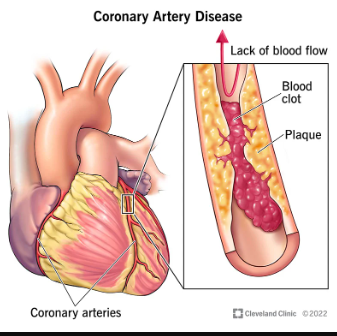

**Data Description**

>**Demographic:**
*  **Sex:** male or female("M" or "F")
*  **Age:** Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

>**Behavioral**
*  **is_smoking:** whether or not the patient is a current smoker ("YES" or "NO")
* **Cigs Per Day:** the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
* **BP Meds:** whether or not the patient was on blood pressure medication (Nominal)
* **Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal)
* **Prevalent Hyp:** whether or not the patient was hypertensive (Nominal)
* **Diabetes:** whether or not the patient had diabetes (Nominal)
Medical(current)
* **Tot Chol:** total cholesterol level (Continuous)
* **Sys BP:** systolic blood pressure (Continuous)
* **Dia BP:** diastolic blood pressure (Continuous)
* **BMI:** Body Mass Index (Continuous)
* **Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* **Glucose:** glucose level (Continuous)
Predict variable (desired target)
* **`10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)`**


In [ ]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Imports for Reading, Exploring and Visulization of the Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# to disply all columns
pd.set_option("max_columns",None)

import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
%matplotlib inline

In [ ]:
# Read the csv file from google drive
# path of csv file
path = '/content/drive/MyDrive/Colab Notebooks/capstone project/Cardiovascular Risk Prediction/'
# adding file name to path
df = pd.read_csv(path + 'data_cardiovascular_risk.csv')

# display head of dataframe 
df.head()              

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Check the dimension of data drame
rows_num = df.shape[0]  # of rows
cols_num = df.shape[1]  # of columns
df.shape

(3390, 17)

In [ ]:
# checking for duplicate rows in a Dataframe
duplicate = df[df.duplicated()]
len(duplicate)

0

* This dataset contains 3390 rows and 17 columns
* And no duplicate rows.
---

**Confirm quickly with .info() methods the datatypes and null values in our dataframe.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# Checking for unique values 
df.nunique().sort_values()

prevalentHyp          2
diabetes              2
prevalentStroke       2
BPMeds                2
TenYearCHD            2
sex                   2
is_smoking            2
education             4
cigsPerDay           32
age                  39
heartRate            68
glucose             132
diaBP               142
sysBP               226
totChol             240
BMI                1259
id                 3390
dtype: int64

* Our dataset has categorical as well as numerical variables. 
* It also includes null values.
* Id column is unique datatype.

---



In [ ]:
# set default gridtype, fontsize and palette
sns.set_style("whitegrid")
sns.set_palette(palette = ['#4169E1', '#FF5F15', '#4CBB17', 
                           '#FF5959','#676FA3', '#FF69B4'])
plt.rcParams['font.size'] = 14

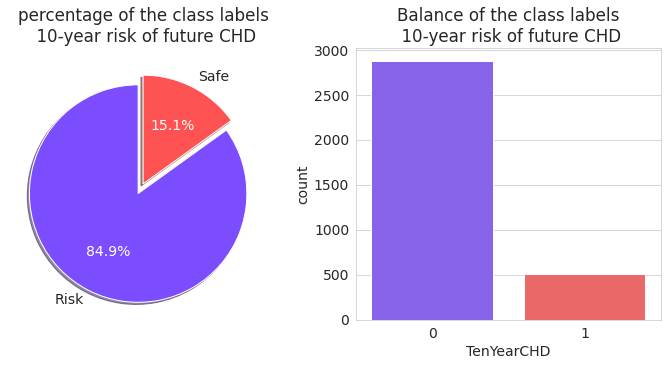

<Figure size 576x432 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize= (12,5))

# labels that passed as title in pie chart
labels = ['Risk', 'Safe']


chd10_percent =  100 * df['TenYearCHD'].mean()
no_chd10_percent = 100 - chd10_percent

# Data that passed in pie chart
values = [no_chd10_percent, chd10_percent]
# degree upto which I explode the slice in pie chart
explode = (0.1, 0)  
#color palette in pie chart
colors = ['#7C4DFF','#FF5252']


plt.figure(figsize= (8,6))

#  pie chart
_, _, autotexts= ax[0].pie(values,explode= explode , labels=labels, autopct='%1.1f%%',
        colors= colors, shadow=True, startangle=90,  textprops={'fontsize': 14})


# add white text on donut chart
for autotext in autotexts:
    autotext.set_color('white')

# for displaying title
ax[0].set_title("percentage of the class labels\n 10-year risk of future CHD")
ax[1].set_title("Balance of the class labels\n 10-year risk of future CHD")

# countplot for TenYearCHD
sns.countplot(data=df,x='TenYearCHD', palette = ['#7C4DFF', '#FF5252'], ax= ax[1])
plt.show();

Get a quick ***statistical*** summary of the numeric columns with .describe()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


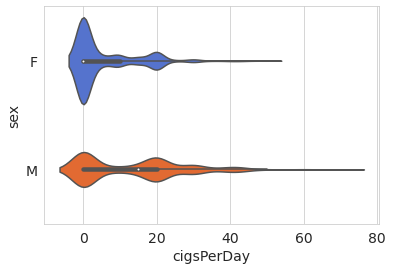

In [ ]:
sns.violinplot(x ='cigsPerDay',y='sex', data= df, orient= 'h')

**Lots of features are categorical, we will plot them in count plot.
for numerial we will plot in histogram.**

In [ ]:
# creating list of contineous nemerical features,
# I am selecting 4 as threshold because of education column 
list_num_var = [col for col in df.columns if df[col].nunique() > 4 ]

# we know that id is unique datatype, so we are removing it.
list_num_var.remove('id')
# selecting dataframe with contineous numeric features
df_cont = df[list_num_var]


# crating list of categorical varible
list_cat_var = [col for col in df.columns if df[col].nunique() <= 4 ]

# creating dataframe of cat var
df_cat = df[list_cat_var]

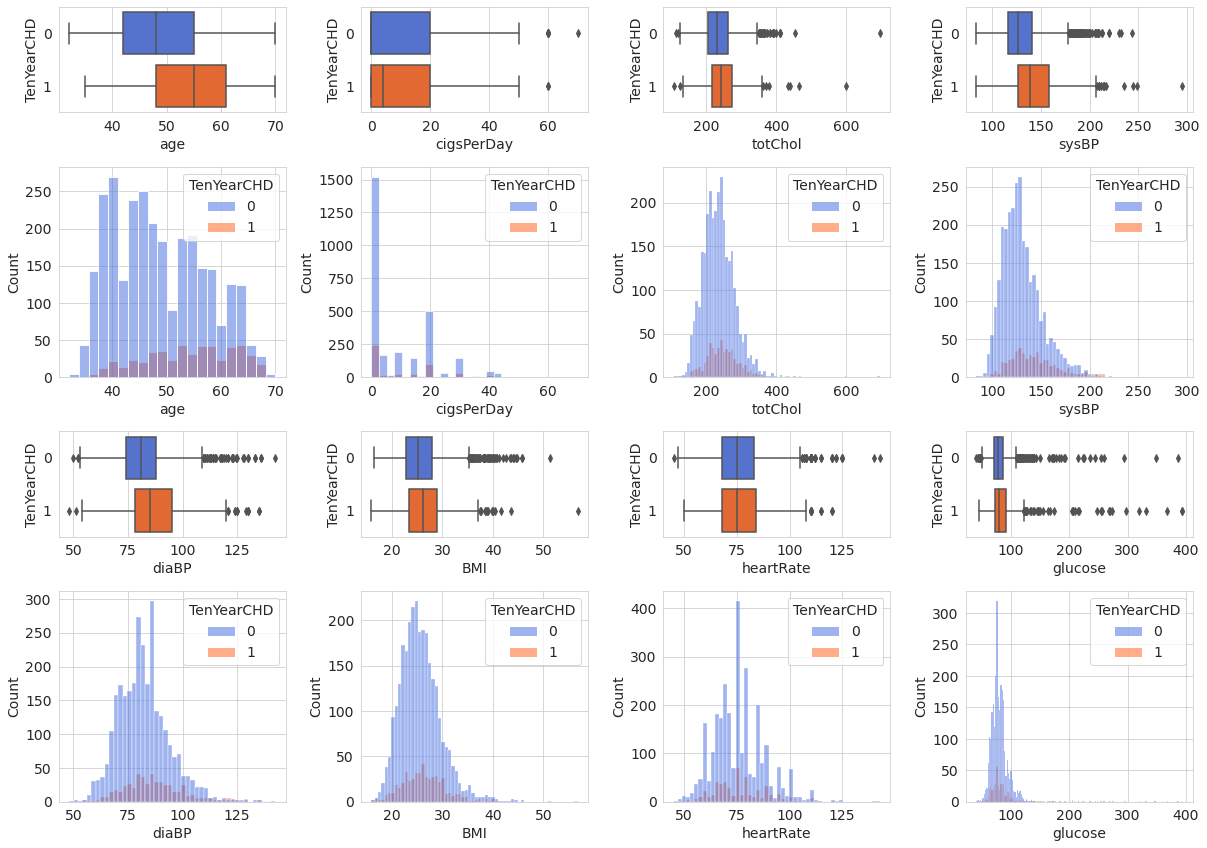

In [ ]:
# create a blank canvas
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(17,12), gridspec_kw={'height_ratios': [1, 2, 1, 2]})

j,k = 0,0

for i in range(16):
    r_num = i // 4
    c_num = i % 4
    ax = axes[r_num, c_num]
    if r_num % 2 == 0:
        sns.boxplot(data= df, x= list_num_var[k], ax= ax,y= 'TenYearCHD',
                  orient= 'h')
        k += 1
    if r_num % 2 == 1:
        sns.histplot(data= df, x= list_num_var[j] , ax= ax, hue = 'TenYearCHD')
        j += 1 
       
# add super title for all subplots 

fig.tight_layout();

In [ ]:
# lets calculate risk rate for each if the categorical varible
def risk_rate_finder(target):
  '''Function that create a series, which risk rate per category of target.'''
  rate = (100 * df.groupby(target)['TenYearCHD'].mean())  # groupby on that featue then mean of churn and multiplied with 100
  return rate

In [ ]:
# lets calculate risk rate for each if the categorical varible

# list of series
risk_rate_list = []

# loop through each categorical variable
for feature in list_cat_var:
  per_feature =  risk_rate_finder(feature)
  risk_rate_list.append(per_feature)

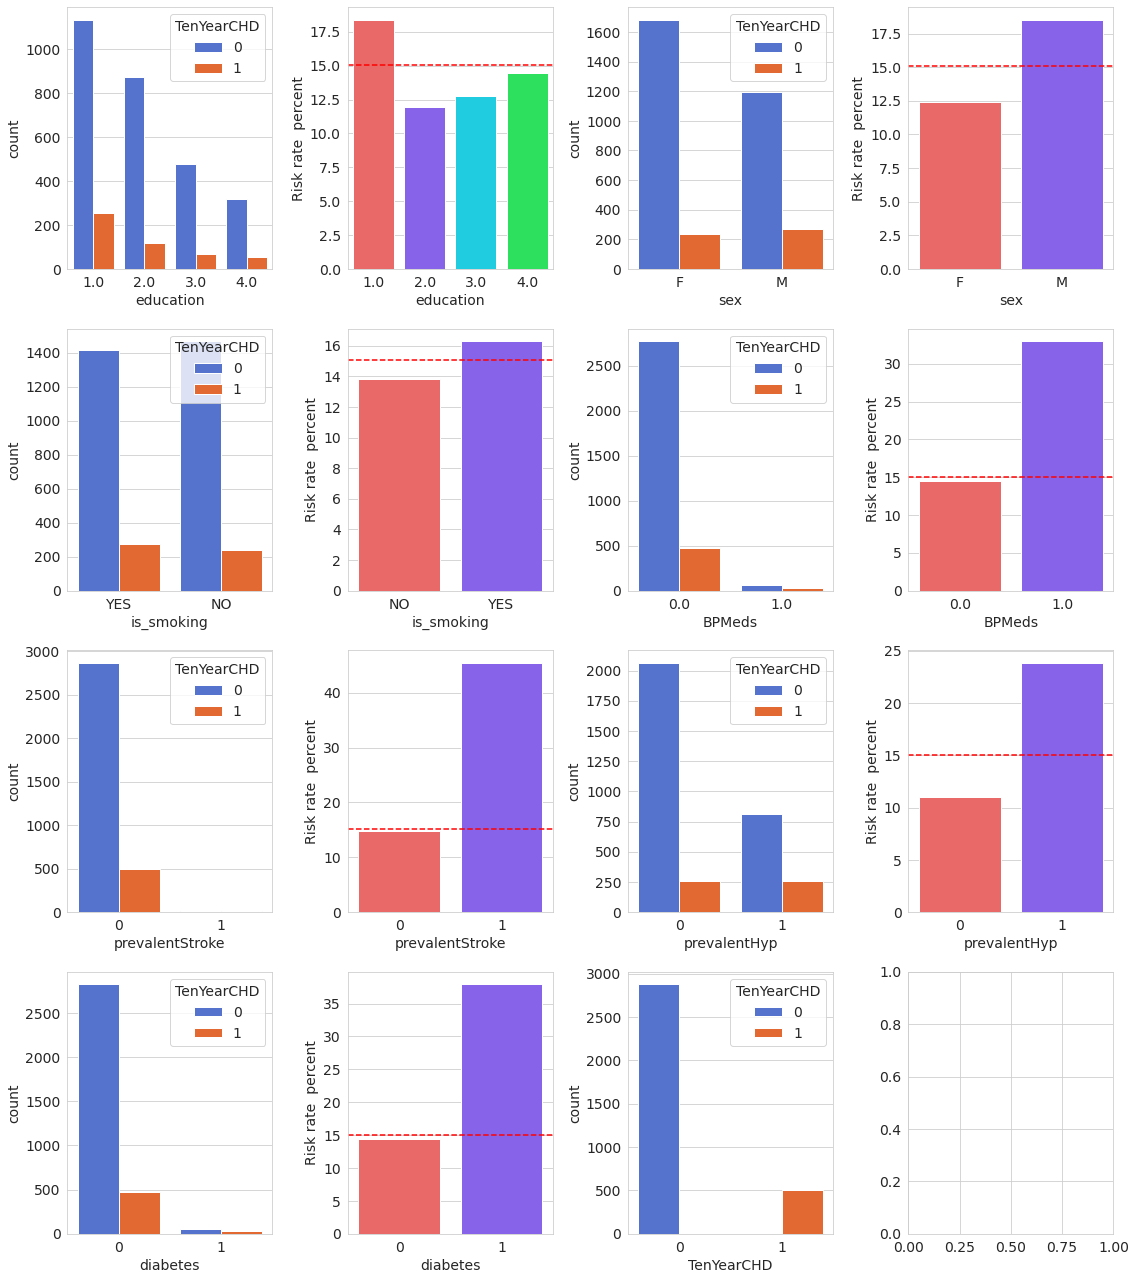

In [ ]:
# create a blank canvas
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16,18))

j,k = 0,0

for i in range(16):
    ax = axes[ i // 4, i % 4]
    if i % 2 == 0:
      sns.countplot(data= df_cat, x= list_cat_var[j], ax= ax, hue= 'TenYearCHD')
      j += 1 
# add super title for all subplots 

    if i % 2 == 1:
      if k < 7:
        sns.barplot(x= risk_rate_list[k].index ,y= risk_rate_list[k].values, ax= ax,
                    palette= ['#FF5252','#7C4DFF','#00E5FF', '#0FFF50'])
        
        ax.set_ylabel('Risk rate  percent')
        
        k  +=1 
    # vertical line at 15.1 (over  all risk rate), chd10_percent(we have calculated it erlier)
        ax.axhline(y = chd10_percent, color = 'red',ls= '--')



# add super title for all subplots 

fig.tight_layout();

* The new columns are duplicate information with inverted encoding.
* Easily fix by simply dropping last column.
* This can be extended to more than 2 categories.


# Correlation check


Before doing Correlation check, we need to do one hot encoding for categorical variables.
Machine learning models can't work with missing data. The process of filling missing values is called [imputation](https://scikit-learn.org/stable/modules/impute.html)

In [ ]:
df_nums = df.select_dtypes(exclude= 'object')  # data frame with numerical features (including boolean datatype)
df_objs = df.select_dtypes(include= 'object')  # data frame with categorical feature

In [ ]:
df_nums.columns

Index(['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
df_objs.columns

Index(['sex', 'is_smoking'], dtype='object')

In [ ]:
# to create dummy variables, drop_firt= True is for one hot-encoding
df_objs = pd.get_dummies(df_objs, drop_first= True)
# concatinate numeric and object (after one-hot encoding)  columns , and drop id column
df_final = pd.concat([df_nums.drop('id',axis= 1), df_objs], axis= 1)

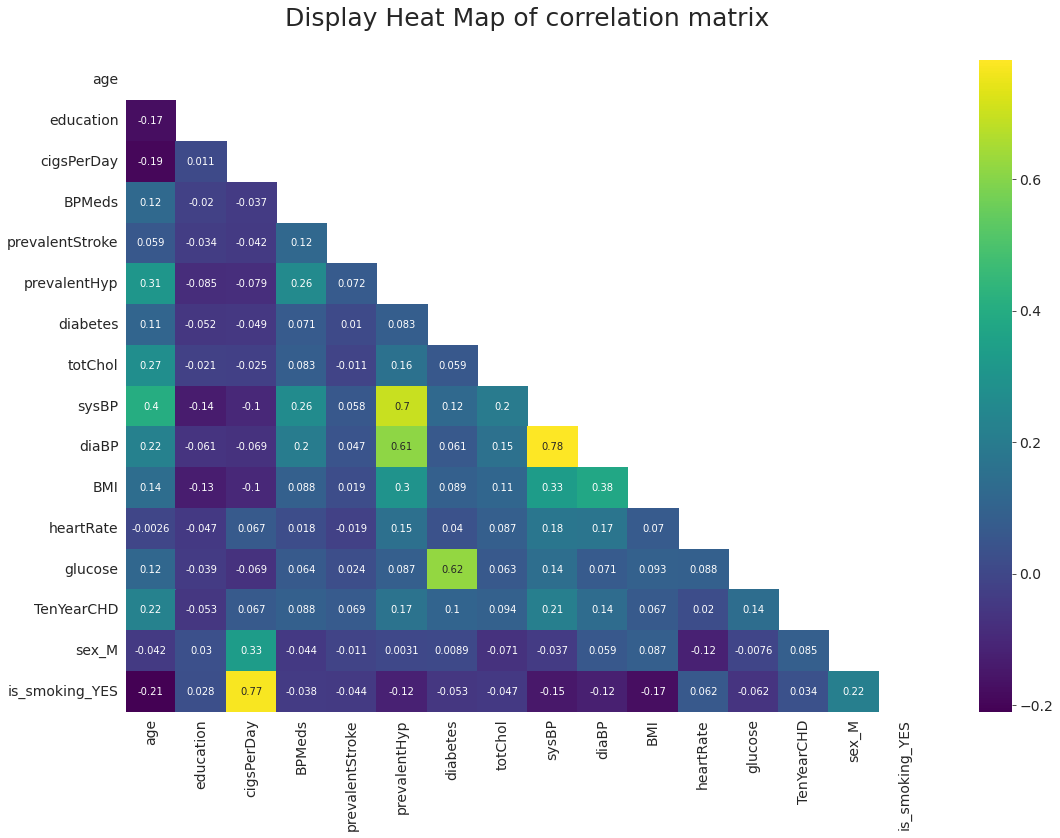

In [ ]:
# Fond correlation marix
corr_df = df_final.corr()
# set default figure size
plt.figure(figsize= (18,12))

# creating mask for lower triangular matrix
mask = np.triu(np.ones_like(corr_df))

# plotting heat map of correlation matrix
sns.heatmap(corr_df, annot= True, cmap= 'viridis', annot_kws={"size":10}, mask= mask)
# add title
plt.title("Display Heat Map of correlation matrix\n", fontsize= 25);

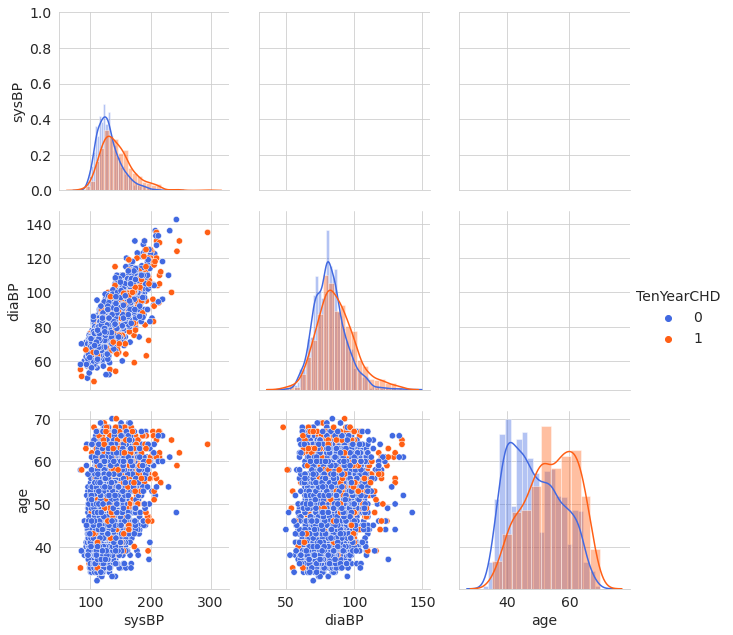

In [ ]:
# list of features that are plotted in pairGrid
list_pairGrid_plot = ['sysBP', 'diaBP', 'age', 'TenYearCHD']

# Creating Blank canvas
g = sns.PairGrid(df[list_pairGrid_plot], hue="TenYearCHD", height=3)
# for lower plot
g = g.map_lower(sns.scatterplot, linewidths=1, edgecolor="w", s=40)
# for diagonal plot
g = g.map_diag(sns.distplot)
# add legend
g = g.add_legend();

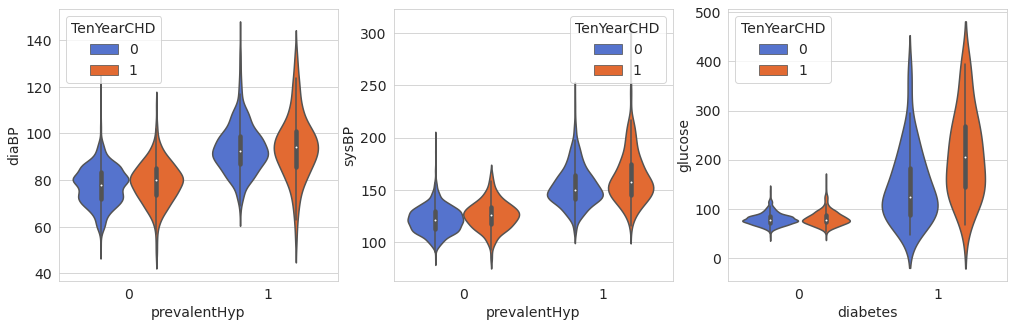

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize= (17,5))

sns.violinplot(data= df, x= "prevalentHyp", y= "diaBP", hue = 'TenYearCHD', ax= ax[0])

sns.violinplot(data= df, x= "prevalentHyp", y= "sysBP", hue = 'TenYearCHD', ax= ax[1])

sns.violinplot(data= df, x= "diabetes", y= "glucose", hue = 'TenYearCHD', ax= ax[2]);

In [ ]:
# correlation with target variable
corr_to_label  = corr_df['TenYearCHD'].sort_values(ascending= False).iloc[1:]  # first value is 1 (self correlation), so we ignoring it. 
corr_to_label  

age                0.224927
sysBP              0.212703
prevalentHyp       0.166544
glucose            0.138200
diaBP              0.135979
diabetes           0.103681
totChol            0.094306
BPMeds             0.088020
sex_M              0.084647
prevalentStroke    0.068627
BMI                0.066947
cigsPerDay         0.066778
is_smoking_YES     0.034143
heartRate          0.020241
education         -0.052751
Name: TenYearCHD, dtype: float64

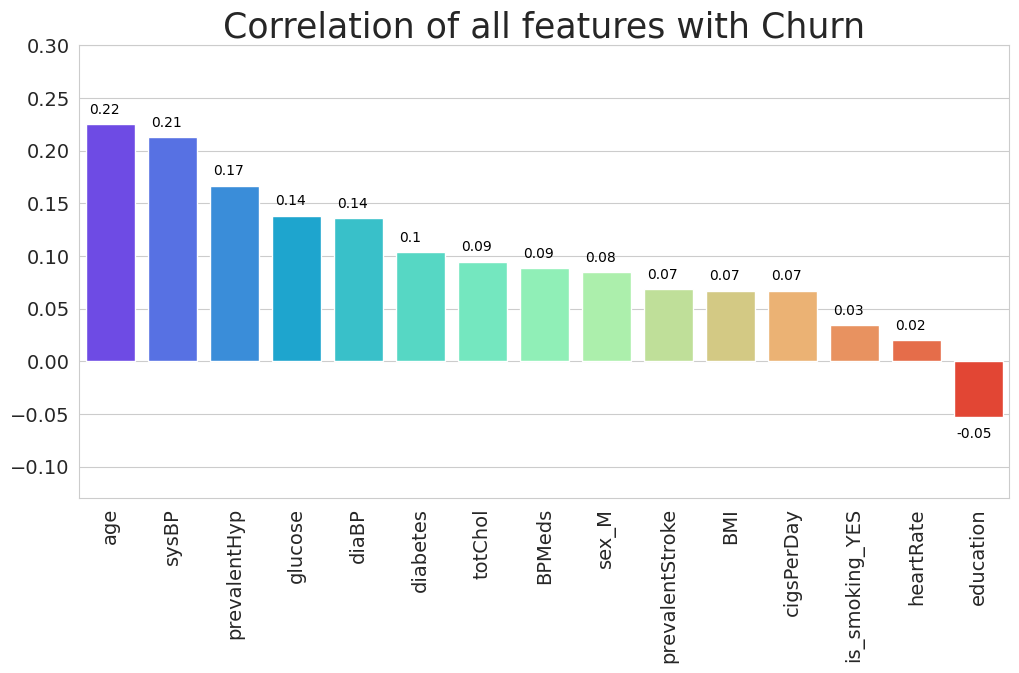

In [ ]:
# for size of plot
plt.figure(figsize=(12,6), dpi= 100)
# bar plot for correlation value of all features with target variable
sns.barplot(x=corr_to_label.index,y= corr_to_label.values, palette= 'rainbow')
#  add title
plt.title("Correlation of all features with Churn", fontsize= 25)

# writing text on plot
for i in range(len(corr_to_label)):
  # positive values are on top of bar 
  if corr_to_label.iloc[i] > 0:
    plt.text(x= i- 0.35,y= corr_to_label.iloc[i] + 0.01,
           s= round(corr_to_label.iloc[i], 2), fontsize=10,
                color= 'black')
  # negative values are just below the bar
  else:
     plt.text(x= i- 0.35,y= corr_to_label.iloc[i]-0.02,
           s= round(corr_to_label.iloc[i], 2), fontsize=10,
                color= 'black')

# adjusting y-limits on y axis 
plt.ylim(-0.13,0.3)
# rotating test on x-axis  
plt.xticks(rotation=90);

* Most of the features have posive correlation with target variable.

## Dealing with null values

In [ ]:
df_final.isna().sum().sort_values(ascending= False)

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
age                  0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
sex_M                0
is_smoking_YES       0
dtype: int64

It looks like we have a lot of null values in our dataframe, let's check in percentage form and then plot them.

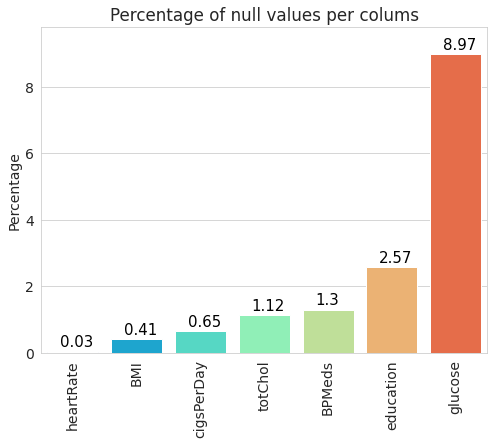

In [ ]:
# for size of plot
plt.figure(figsize=(8,6))

# series that contain the percentage of null values
percent_null = 100 * df_final.isna().sum().sort_values() / len(df)

# grab only that columns that have null values
percent_null = percent_null[percent_null>0]

# bar plot for churn rate per service calls
sns.barplot(x = percent_null.index, y= percent_null.values, palette='rainbow')

# writing text on a bar plot
for i in range(len(percent_null)):
  # value which we want to write, x and y are position , s is value
  val = percent_null.iloc[i]
  plt.text(x= i- 0.2,y= val + 0.15,
            s= round(val, 2), fontsize=15,
                  color= 'black')


# set  title , ylimit and y_label
plt.title("Percentage of null values per colums")
plt.xticks(rotation=90)
plt.ylim(0,9.8)
plt.ylabel("Percentage");

In [ ]:
# only one row have null value in heartRate column , I am dropping that row
df_final = df_final.dropna(axis=0,subset= ['heartRate'])

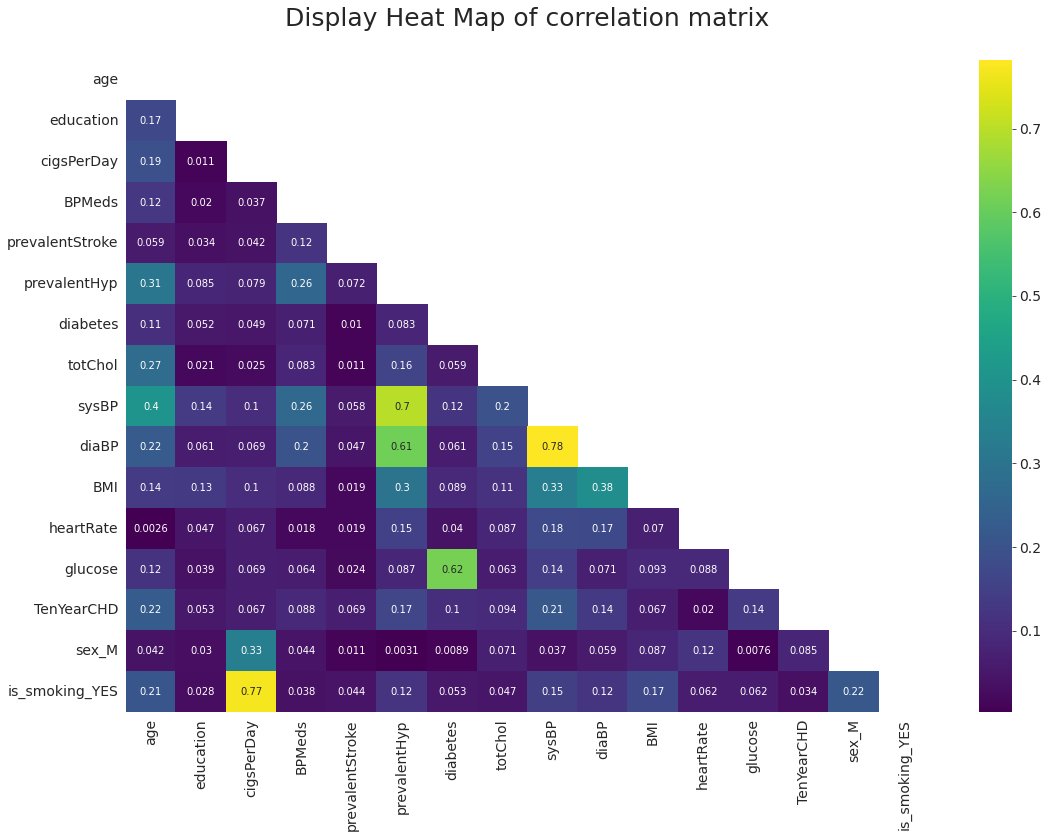

In [ ]:
# Fond correlation marix
corr_df = df_final.corr()
# set default figure size
plt.figure(figsize= (18,12))

# creating mask for lower triangular matrix
mask = np.triu(np.ones_like(corr_df))

# plotting heat map of correlation matrix
sns.heatmap(abs(corr_df), annot= True, cmap= 'viridis', annot_kws={"size":10}, mask= mask)
# add title
plt.title("Display Heat Map of correlation matrix\n", fontsize= 25);

In [ ]:
df_final.isna().sum().sort_values(ascending= False)

education          87
totChol            38
BMI                14
age                 0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
sysBP               0
diaBP               0
heartRate           0
glucose             0
TenYearCHD          0
sex_M               0
is_smoking_YES      0
dtype: int64

**Replacing Missing Values Based Upon Correlated Features**

In [ ]:
df_final['glucose'] = df_final.groupby('diabetes')['glucose'].transform(lambda val: val.fillna(val.mean()))

In [ ]:
df_final['cigsPerDay'] = df_final.groupby('is_smoking_YES')['cigsPerDay'].transform(lambda val: val.fillna(val.mean()))

In [ ]:
df_final['BPMeds'] = df_final.groupby('prevalentHyp')['BPMeds'].transform(lambda val: val.fillna(val.mean()))

I will use simple imputer

In [ ]:
X = df_final.drop('TenYearCHD', axis= 1)
y = df_final['TenYearCHD'].copy()

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

X = imputer.fit_transform(X)

##Training and Validation Set
Finally, let's split the dataset into a training and validation set. We'll use a randomly select 25% subset of the data for validation. Also, we'll use just the numeric and encoded columns, since the inputs to our model must be numbers.

In [ ]:
# split = StratifiedShuffleSplit(n_splits= 1, test_size= 0.25, random_state= 42)

# for  train_index, test_index in split.split(df_final, df_final['TenYearCHD']):
#   train_set = df_final.iloc[train_index]
#   test_set = df_final.iloc[train_index]

In [ ]:
# train_set['TenYearCHD'].value_counts() / len(train_set)

In [ ]:
# test_set['TenYearCHD'].value_counts() / len(test_set)

In [ ]:
# X_train = train_set.drop('TenYearCHD',axis=1)
# X_test = test_set.drop('TenYearCHD',axis=1)

# y_train = train_set['TenYearCHD']
# y_test = test_set['TenYearCHD']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 10)

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Fit the scaler to the numeric columns
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [ ]:
model_accuracy = {}

def model_performance(model_type, train_X, test_X, model_name):
    """print classification report of matrix."""
    model_type.fit(train_X, y_train)
    pred_y = model_type.predict(test_X)
    print(classification_report(y_test, pred_y))
    model_accuracy[str(model_name)] = accuracy_score(y_test, pred_y)  # dont want to grab ()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [115]:
log_model = LogisticRegression()
model_performance(log_model, scaled_X_train, scaled_X_test, "Logestic Regression")

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       853
           1       0.00      0.00      0.00       164

    accuracy                           0.84      1017
   macro avg       0.42      0.50      0.46      1017
weighted avg       0.70      0.84      0.77      1017



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini',random_state=42)
model_performance(dt, X_train, X_test, "Single Decision Tree")

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       853
           1       0.23      0.20      0.21       164

    accuracy                           0.76      1017
   macro avg       0.54      0.53      0.54      1017
weighted avg       0.75      0.76      0.76      1017



In [ ]:
X = df_final.drop('TenYearCHD', axis= 1)
y = df_final['TenYearCHD']

In [95]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)
print("oringinal samples in data", len(y))
print("Reshampled dataset", len(y_smote))

oringinal samples in data 3389
Reshampled dataset 5758


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.30, random_state= 10)

In [111]:
y_test.value_counts()

0    867
1    861
Name: TenYearCHD, dtype: int64

In [100]:
y_train.value_counts()

0    2039
1    1991
Name: TenYearCHD, dtype: int64

In [ ]:
# scaling our parameter
scaler = StandardScaler()  # creating StandardScaler object
# scaling our data using fit transform
scaled_X_train_s = scaler.fit_transform(X_train)
scaled_X_test_s = scaler.transform(X_test)

In [ ]:
# log_model = LogisticRegression()
# model_performance(log_model, scaled_X_train, scaled_X_test, "Logestic Regression")

In [120]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini',random_state=42)
model_performance(dt, X_train, X_test, "Single Decision Tree")

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       867
           1       0.81      0.86      0.84       861

    accuracy                           0.83      1728
   macro avg       0.83      0.83      0.83      1728
weighted avg       0.83      0.83      0.83      1728

